## Manage The Wine Quality
### Author: Elsie Lin
### Data source:
- https://www.kaggle.com/rajyellow46/wine-quality

### Importing Libraries and Preprocessing Data

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

#Libraries for data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Libraries for decision tree and random forest model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#For performing hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

#Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
!pip install bioinfokit

In [3]:
# import wine data
wine = pd.read_csv('winequalityN.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Encode the Label of wine type
le = LabelEncoder()
wine.type = le.fit_transform(wine.type)

In [5]:
wine = wine.dropna()
wine.type.value_counts()

1    4870
0    1593
Name: type, dtype: int64

In [6]:
# Create a binary quality:
# For quality of 6 or more, it is in the category of good(1)
# For quality of 5 or lower, it is in the category of not good(0)
wine['quality2'] = np.where(wine['quality']>= 6, 1, 0)
wine.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0
6496,0,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,1


## PCA
### White Wine

In [7]:
white_wine = wine.loc[wine['type']==1]
white_wine.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [8]:
red_wine = wine.loc[wine['type']==0]
red_wine.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
4898,0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
4899,0,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


In [9]:
X_white = white_wine.drop(['type','quality','quality2'], axis=1)
X_red = red_wine.drop(['type','quality','quality2'], axis=1)

In [10]:
scaler = StandardScaler()
scaler.fit(X_white)

StandardScaler()

In [11]:
scaled_data = scaler.transform(X_white)
scaled_data

array([[ 0.17178579, -0.08029237,  0.21340186, ..., -1.24698975,
        -0.34768522, -1.39447525],
       [-0.65823018,  0.21816115,  0.04797933, ...,  0.74125879,
         0.00262553, -0.82588919],
       [ 1.47609661,  0.01919213,  0.54424692, ...,  0.47615899,
        -0.43526291, -0.3385297 ],
       ...,
       [-0.30250905,  0.41713016,  0.21340186, ..., -0.25286548,
        -0.26010753, -0.74466261],
       [-1.60681986,  0.11867664, -0.28286573, ...,  1.0063586 ,
        -0.96072904,  1.85458797],
       [-1.01395131, -0.67719941,  0.37882439, ...,  0.47615899,
        -1.48619517,  1.04232216]])

In [12]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.29296388 0.14294505]
[125.27599583  87.50752065]


In [13]:
components = pca.transform(scaled_data)
components.shape

(4870, 2)

In [14]:
pca_values_df = pd.DataFrame(data = components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_values_df.insert(0, "quality2", white_wine["quality2"].values, True)
pca_values_df

,quality2,Principal Component 1,Principal Component 2
0,1,3.675676,-0.553907
1,1,-0.642363,0.427721
2,1,0.156342,-1.189335
3,1,1.455643,0.103042
4,1,1.455643,0.103042
...,...,...,...
4865,1,-1.539558,0.890923
4866,1,-2.093098,0.397922
4867,0,1.295721,0.491002
4868,1,-3.405015,0.923287


In [15]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
### Change
loadings_df['variable'] = X_white.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2
variable,,
fixed acidity,0.156927,-0.587656
volatile acidity,0.005827,0.045234
citric acid,0.144008,-0.341284
residual sugar,0.427417,0.007619
chlorides,0.212371,-0.008732
free sulfur dioxide,0.300295,0.293348
total sulfur dioxide,0.406631,0.244311
density,0.511597,0.004396
pH,-0.127509,0.582661


In [16]:
loadings_df['distance'] = loadings_df['PC1']**2+loadings_df['PC2']**2
loadings_df.sort_values(by='distance',ascending=False)

,PC1,PC2,distance
variable,,,
fixed acidity,0.156927,-0.587656,0.369965
pH,-0.127509,0.582661,0.355752
density,0.511597,0.004396,0.261750
total sulfur dioxide,0.406631,0.244311,0.225036
alcohol,-0.437482,-0.033321,0.192500
residual sugar,0.427417,0.007619,0.182744
free sulfur dioxide,0.300295,0.293348,0.176230
citric acid,0.144008,-0.341284,0.137213
sulphates,0.043690,0.222804,0.051550


In [28]:
# get PC scores
pca_scores = PCA().fit_transform(scaled_data)
from bioinfokit.visuz import cluster
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=red_wine.columns.values, 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2))

## red

In [29]:
scaler2 = StandardScaler()
scaler2.fit(X_red)

StandardScaler()

In [30]:
scaled_data2 = scaler2.transform(X_red)
scaled_data2

array([[-0.53235272,  0.96151114, -1.39412302, ...,  1.29271473,
        -0.57682517, -0.95750201],
       [-0.30248543,  1.96574988, -1.39412302, ..., -0.71692235,
         0.13046091, -0.58187   ],
       [-0.30248543,  1.29625739, -1.18876559, ..., -0.32796033,
        -0.04636061, -0.58187   ],
       ...,
       [-1.16448775, -0.09851864, -0.72671136, ...,  0.7092717 ,
         0.54304445,  0.545026  ],
       [-1.39435503,  0.65466041, -0.77805072, ...,  1.68167674,
         0.30728243, -0.206238  ],
       [-1.33688821, -1.21433947,  1.01882683, ...,  0.5147907 ,
         0.01257989,  0.545026  ]])

In [31]:
pca2 = PCA(n_components = 2)
pca2.fit(scaled_data2)
print(pca2.explained_variance_ratio_)
print(pca2.singular_values_)

[0.28169185 0.17556306]
[70.25728622 55.46522713]


In [32]:
components2 = pca2.transform(scaled_data2)
components2.shape

(1593, 2)

In [33]:
pca_values_df2 = pd.DataFrame(data = components2, columns = ['Principal Component 1', 'Principal Component 2'])
pca_values_df2.insert(0, "quality2", red_wine["quality2"].values, True)
pca_values_df2

,quality2,Principal Component 1,Principal Component 2
0,0,-1.629325,0.458198
1,0,-0.803922,1.858520
2,0,-0.755760,0.885060
3,1,2.349197,-0.266766
4,0,-1.629325,0.458198
...,...,...,...
1588,1,-1.238658,0.929627
1589,0,-2.153319,0.817738
1590,1,-1.457304,0.311991
1591,0,-2.272376,0.982744


In [34]:
loadings2 = pca2.components_
num_pc2 = pca2.n_features_
pc_list2 = ["PC"+str(i) for i in list(range(1, num_pc2+1))]
loadings_df2 = pd.DataFrame.from_dict(dict(zip(pc_list2, loadings2)))
### Change
loadings_df2['variable'] = X_red.columns.values
loadings_df2 = loadings_df2.set_index('variable')
loadings_df2

,PC1,PC2
variable,,
fixed acidity,0.488906,-0.110563
volatile acidity,-0.238948,0.274854
citric acid,0.463686,-0.152717
residual sugar,0.146708,0.271003
chlorides,0.212338,0.147396
free sulfur dioxide,-0.033972,0.512903
total sulfur dioxide,0.023976,0.568306
density,0.394981,0.234120
pH,-0.438191,0.006778


In [35]:
loadings_df2['distance'] = loadings_df2['PC1']**2+loadings_df2['PC2']**2
loadings_df2.sort_values(by='distance',ascending=False)

,PC1,PC2,distance
variable,,,
total sulfur dioxide,0.023976,0.568306,0.323547
free sulfur dioxide,-0.033972,0.512903,0.264223
fixed acidity,0.488906,-0.110563,0.251253
citric acid,0.463686,-0.152717,0.238327
density,0.394981,0.234120,0.210822
pH,-0.438191,0.006778,0.192057
alcohol,-0.111784,-0.388941,0.163771
volatile acidity,-0.238948,0.274854,0.132641
residual sugar,0.146708,0.271003,0.094966


In [36]:
# get PC scores
pca_scores2 = PCA().fit_transform(scaled_data2)
from bioinfokit.visuz import cluster
# get 2D biplot
cluster.biplot(cscore=pca_scores2, loadings=loadings2, labels=red_wine.columns.values, 
               var1=round(pca2.explained_variance_ratio_[0]*100, 2),
    var2=round(pca2.explained_variance_ratio_[1]*100, 2))

## Distribution

In [37]:
X = wine.drop('quality', axis=1)
y = wine.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [38]:
values_distribution = pd.DataFrame(y.value_counts())
values_distribution

,quality
6,2820
5,2128
7,1074
4,214
8,192
3,30
9,5


Text(0.5, 1.0, 'Wine Quality Distribution')

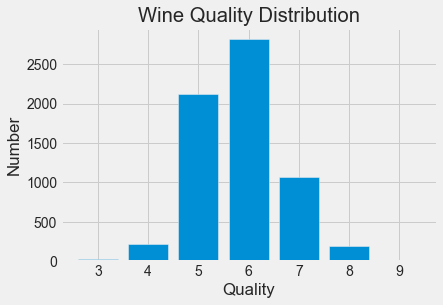

In [39]:
plt.bar(values_distribution.index, values_distribution.quality)
plt.xlabel("Quality")
plt.ylabel("Number")
plt.title("Wine Quality Distribution")

In [40]:
type_distribution = pd.DataFrame(X.type.value_counts())
type_distribution

,type
1,4870
0,1593


Text(0.5, 1.0, 'Wine Type Distribution')

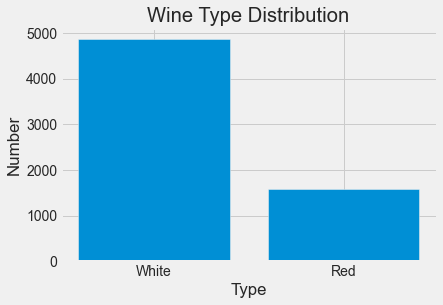

In [41]:
plt.bar(['White','Red'], type_distribution.type)
plt.xlabel("Type")
plt.ylabel("Number")
plt.title("Wine Type Distribution")

## Decision Tree

In [42]:
white_X = white_wine.drop(['type','quality','quality2'], axis=1)
white_y = white_wine.quality2
white_y.head(2)

0    1
1    1
Name: quality2, dtype: int32

In [43]:
red_X = red_wine.drop(['type','quality','quality2'], axis=1)
red_y = red_wine.quality2
red_y.head(2)

4898    0
4899    0
Name: quality2, dtype: int32

In [44]:
# White Wine
X_train1, X_test1, y_train1, y_test1 = train_test_split(white_X, white_y, random_state=42)
# Red Wine
X_train0, X_test0, y_train0, y_test0 = train_test_split(red_X, red_y, random_state=42)

In [45]:
# White Wine decision tree tuning
white_tuning = pd.DataFrame(columns=['mn_leaf','mn_sample','accuracy'])
for mn_leaf in np.arange(0.05,0.5,0.05):
    for mn_sample in np.arange(0.05,0.5,0.05):
        tree_clf1 = DecisionTreeClassifier(max_depth=3,min_samples_split=mn_sample,min_samples_leaf=mn_leaf,random_state=42)
        tree_clf1.fit(X_train1, y_train1)
        y_pred1 = tree_clf1.predict(X_test1)
        white_tuning = white_tuning.append({'mn_leaf':mn_leaf,'mn_sample':mn_sample,'accuracy':accuracy_score(y_test1, y_pred1)},
                                      ignore_index=True)
        #print(f"accuracy score: {accuracy_score(y_test0, y_pred0)}\n")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_test0, y_pred0)}\n")
white_tuning.sort_values(by='accuracy',ascending=False)

,mn_leaf,mn_sample,accuracy
0,0.05,0.05,0.747947
10,0.10,0.10,0.747947
15,0.10,0.35,0.747947
14,0.10,0.30,0.747947
13,0.10,0.25,0.747947
...,...,...,...
57,0.35,0.20,0.662562
56,0.35,0.15,0.662562
55,0.35,0.10,0.662562
54,0.35,0.05,0.662562


accuracy score: 0.7479474548440066

Confusion Matrix: 
 [[198 213]
 [ 94 713]]



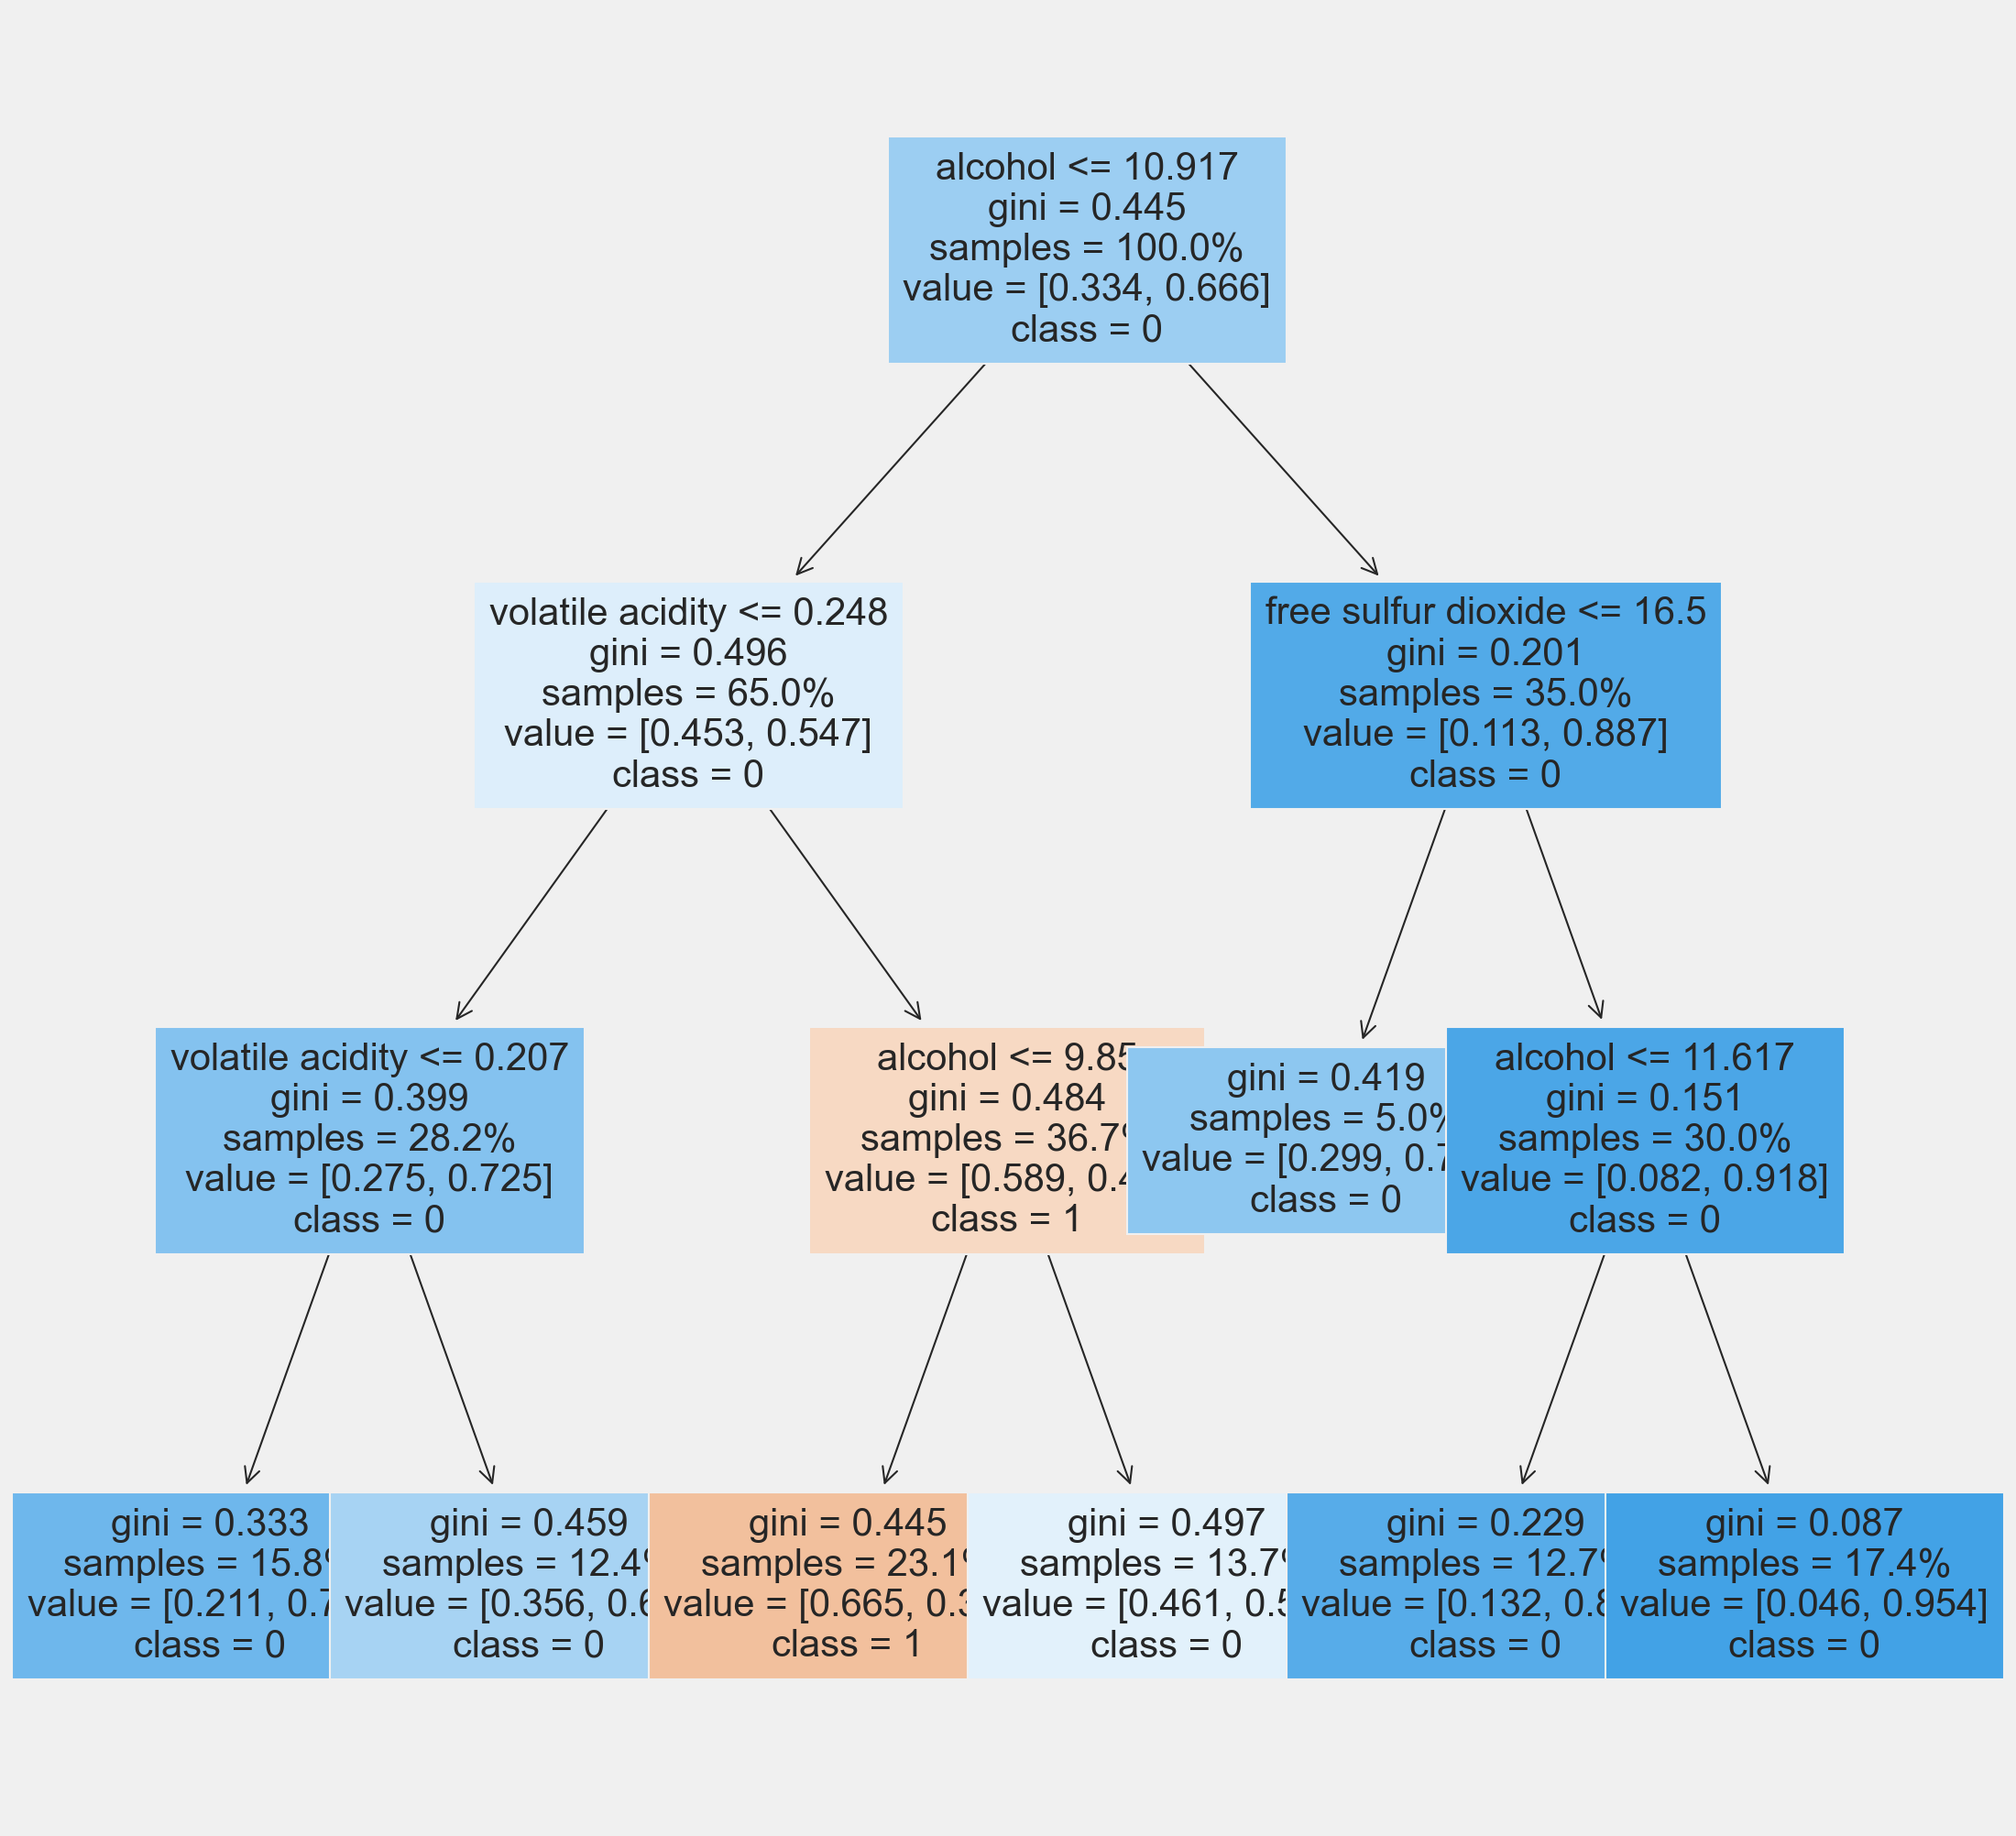

In [46]:
# Decision Tree for White Wine
tree_clf1 = DecisionTreeClassifier(max_depth=3,min_samples_split=0.05,min_samples_leaf=0.05,random_state=42)
tree_clf1.fit(X_train1, y_train1)

y_pred1 = tree_clf1.predict(X_test1)        
print(f"accuracy score: {accuracy_score(y_test1, y_pred1)}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test1, y_pred1)}\n")

fn=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cn=['1','0']


from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(tree_clf1,
               feature_names = fn, 
               class_names=cn,
               filled = True,proportion=True, fontsize=10);
fig.savefig('DT_white.png')

In [47]:
# Red Wine decision tree tuning
red_tuning = pd.DataFrame(columns=['mn_leaf','mn_sample','accuracy'])
for mn_leaf in np.arange(0.05,0.5,0.05):
    for mn_sample in np.arange(0.05,0.5,0.05):
        tree_clf0 = DecisionTreeClassifier(max_depth=3,min_samples_split=mn_sample,min_samples_leaf=mn_leaf,random_state=42)
        tree_clf0.fit(X_train0, y_train0)
        y_pred0 = tree_clf0.predict(X_test0)
        red_tuning = red_tuning.append({'mn_leaf':mn_leaf,'mn_sample':mn_sample,'accuracy':accuracy_score(y_test0, y_pred0)},
                                      ignore_index=True)
        #print(f"accuracy score: {accuracy_score(y_test0, y_pred0)}\n")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_test0, y_pred0)}\n")
red_tuning.sort_values(by='accuracy',ascending=False)

,mn_leaf,mn_sample,accuracy
10,0.10,0.10,0.706767
9,0.10,0.05,0.706767
13,0.10,0.25,0.706767
12,0.10,0.20,0.706767
11,0.10,0.15,0.706767
...,...,...,...
42,0.25,0.35,0.661654
43,0.25,0.40,0.661654
44,0.25,0.45,0.661654
80,0.45,0.45,0.661654


accuracy score: 0.706766917293233

Confusion Matrix: 
 [[134  45]
 [ 72 148]]



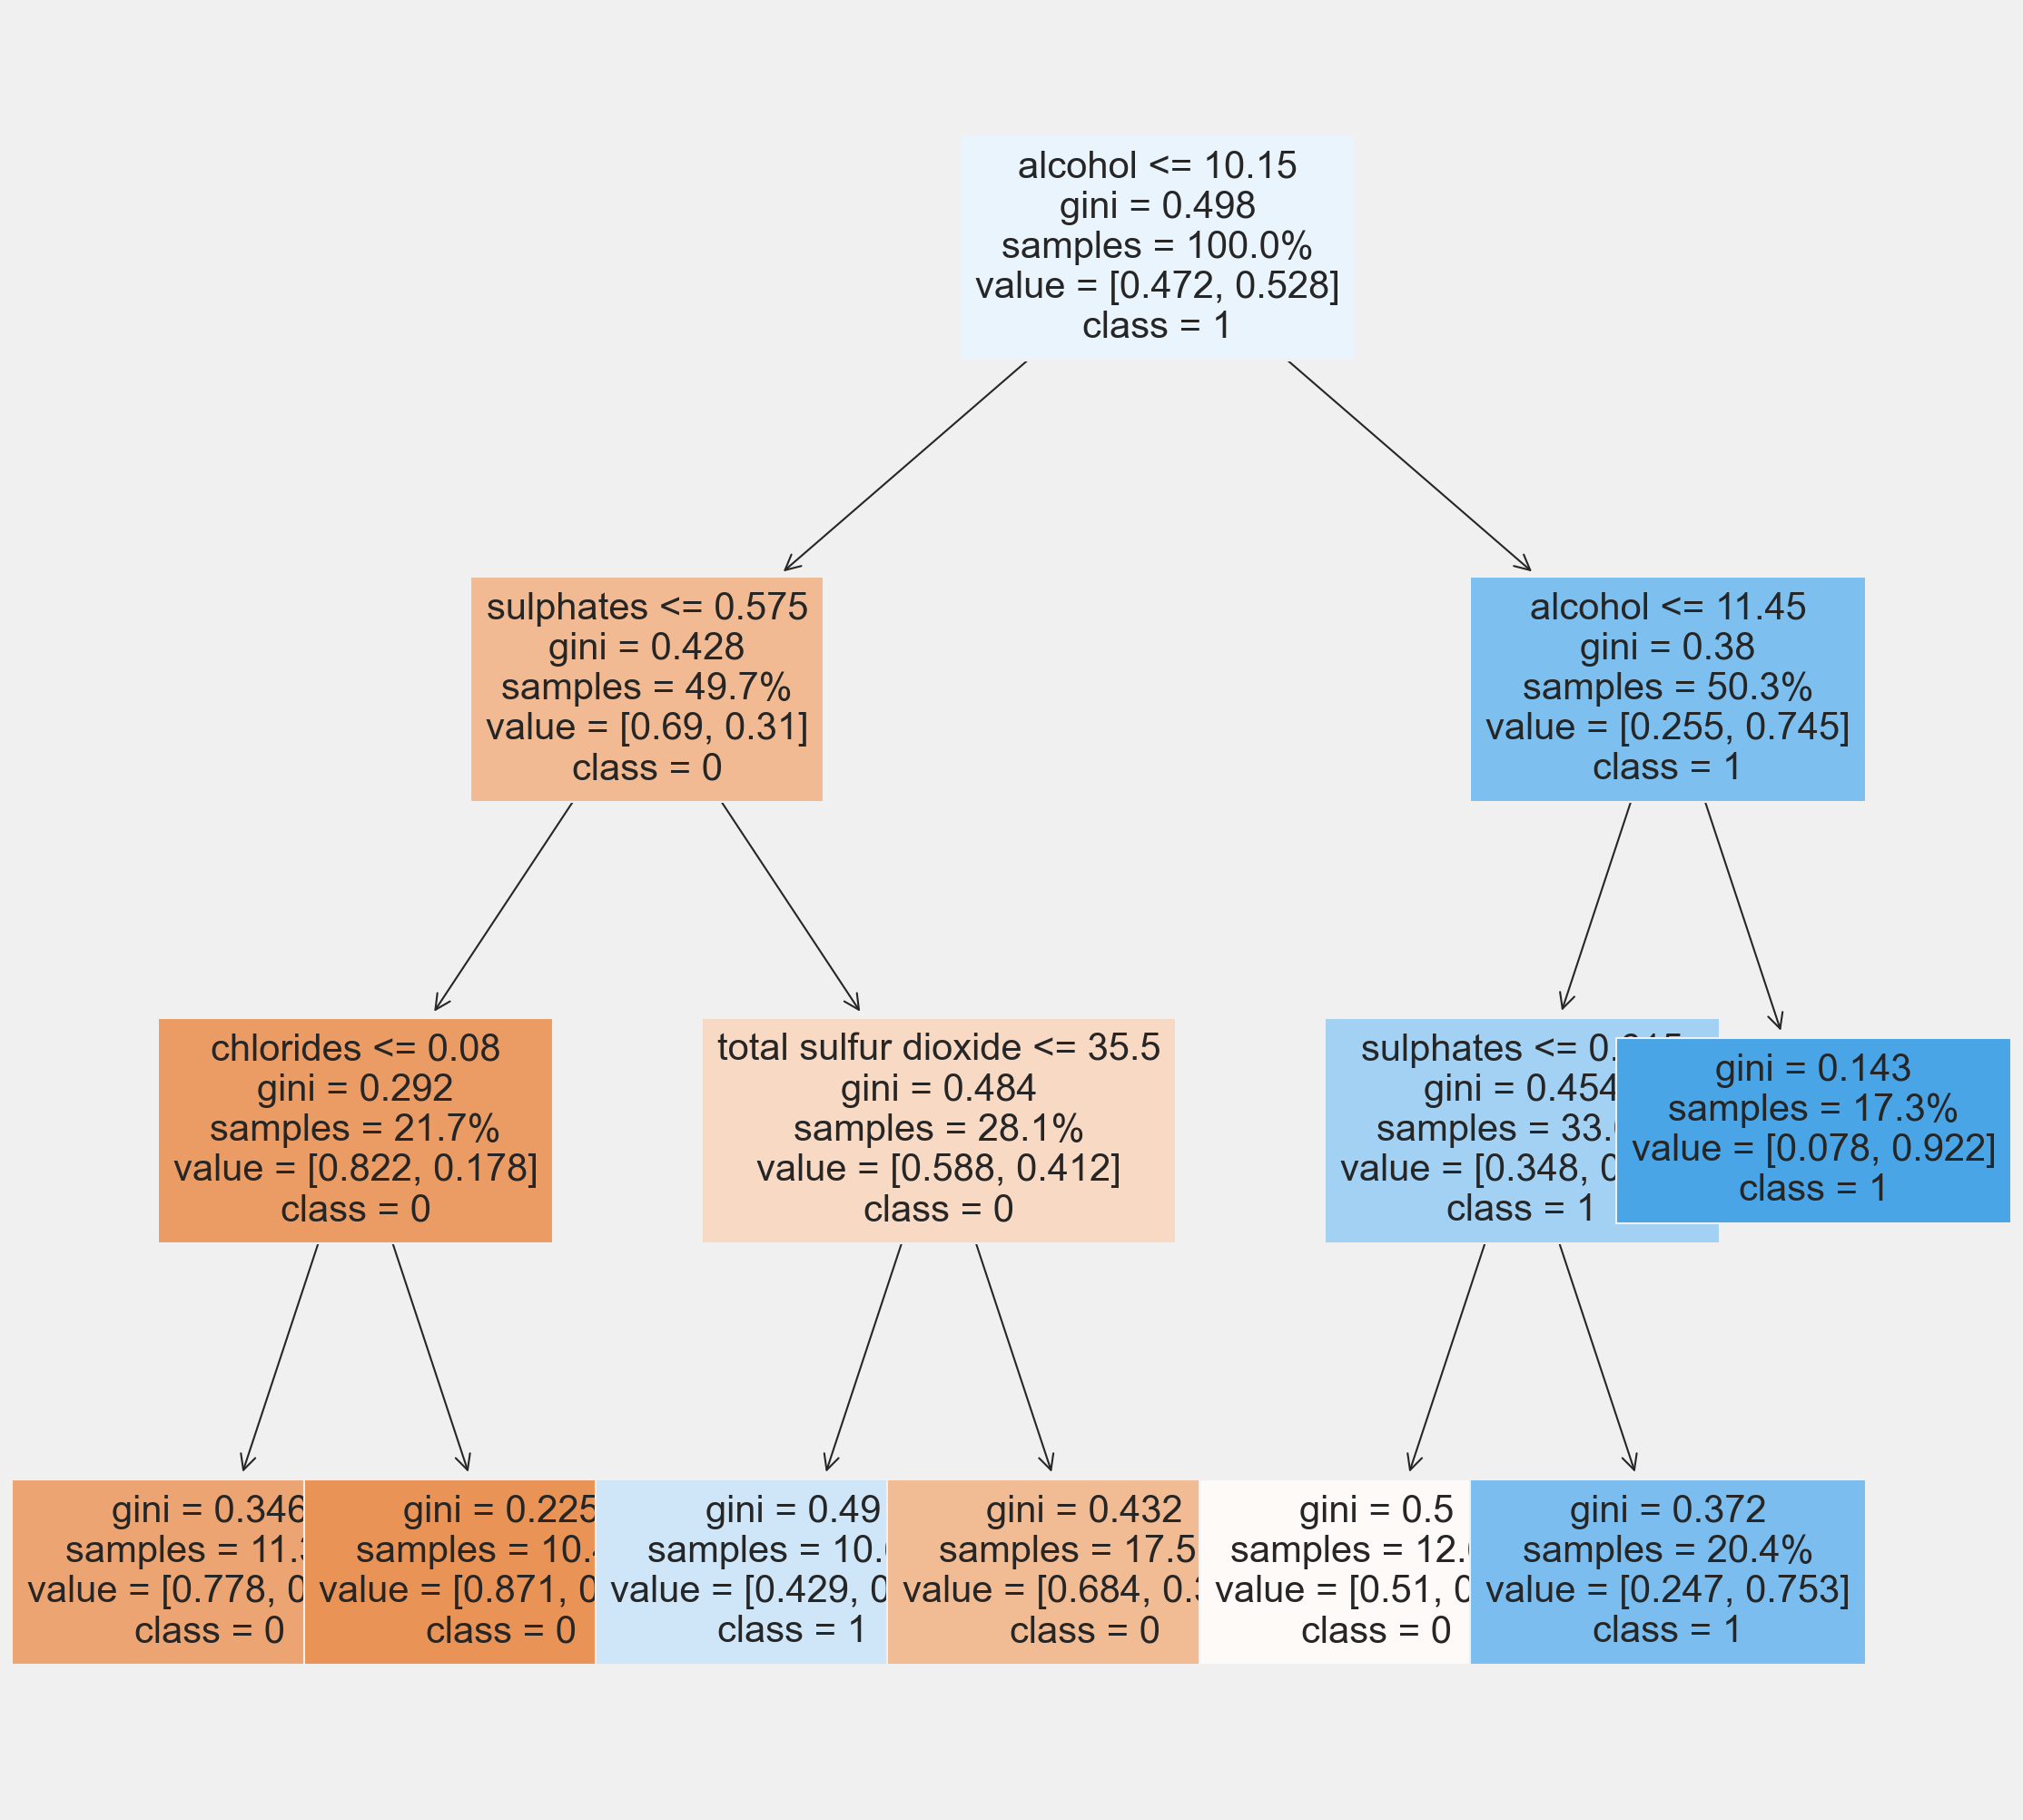

In [48]:
# Red Wine Decision Tree
tree_clf0 = DecisionTreeClassifier(max_depth=3,min_samples_split=0.1,min_samples_leaf=0.1,random_state=42)
tree_clf0.fit(X_train0, y_train0)
y_pred0 = tree_clf0.predict(X_test0)
print(f"accuracy score: {accuracy_score(y_test0, y_pred0)}\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test0, y_pred0)}\n")
from sklearn import tree
fn=['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(tree_clf0,
               feature_names = fn, 
               class_names=cn,
               filled = True,proportion=True,fontsize=10);
fig.savefig('DT_red.png')